# 1- Preparando os dados e bibliotecas

### 1.1- Importando as bibliotecas para o projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2- Importando o conjunto de dados

In [2]:
path = 'C:/Github/automobile/automobile_data.csv'
cars = pd.read_csv(path)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### 1.3- Verificação inicial do conjunto de dados

In [3]:
#detalhando as informações do dataframe
print('Linhas:  ', cars.shape[0])
print('Colunas: ', cars.shape[1])
print('\n Informações das colunas:  \n', cars.columns.tolist())
print('\n Valores nulos  :', cars.isnull().values.sum())
print('\n Valores faltantes:  ', cars.isna().values.sum())
print('\n Valores únicos:  \n', cars.nunique())

Linhas:   205
Colunas:  26

 Informações das colunas:  
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

 Valores nulos  : 0

 Valores faltantes:   0

 Valores únicos:  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio

In [4]:
# Conhecendo os tipos de variáveis de cada coluna
print(cars.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


### 1.4- Tratamento e limpeza dos dados

In [5]:
cars.head(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.00,160,5500,16,22,?


In [6]:
df = cars[cars['normalized-losses'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


In [7]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna normalized-losses
normalized_full = cars['normalized-losses'].loc[cars['normalized-losses'] != '?']
normalized_mean = normalized_full.astype(int).mean()
cars['normalized-losses'] = cars['normalized-losses'].replace('?', normalized_mean).astype(int)
cars['normalized-losses']

0      122
1      122
2      122
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: int32

In [8]:
df = cars[cars['num-of-doors'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122,mazda,diesel,std,?,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [9]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna num-of-doors
cars['num-of-doors'] = cars['num-of-doors'].replace('?', 'four')

In [10]:
df = cars[cars['bore'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,10945
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,11845
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,?,?,9.4,101,6000,17,23,13645
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [11]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna bore
bore_full = cars['bore'].loc[cars['bore'] != '?']
bore_float = pd.to_numeric(bore_full, errors='coerce')
bore_mean = bore_float.mean()
cars['bore'] = cars['bore'].replace('?', bore_mean)
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars['bore'].iloc[51:62]

51    3.030000
52    3.030000
53    3.030000
54    3.080000
55    3.329751
56    3.329751
57    3.329751
58    3.329751
59    3.390000
60    3.390000
61    3.390000
Name: bore, dtype: float64

In [12]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna stroke
stroke_full = cars['stroke'].loc[cars['stroke'] != '?']
stroke_float = pd.to_numeric(stroke_full, errors='coerce')
stroke_mean = stroke_float.mean()
cars['stroke'] = cars['stroke'].replace('?', stroke_mean)
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars['stroke'].iloc[51:62]

51    3.150000
52    3.150000
53    3.150000
54    3.150000
55    3.255423
56    3.255423
57    3.255423
58    3.255423
59    3.390000
60    3.390000
61    3.390000
Name: stroke, dtype: float64

In [13]:
df = cars[cars['horsepower'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9895


In [14]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna horsepower
hp_full = cars['horsepower'].loc[cars['horsepower'] != '?']
hp_mean = hp_full.astype(int).mean()
cars['horsepower'] = cars['horsepower'].replace('?', hp_mean).astype(int)
cars['horsepower'].iloc[128:133]

128    207
129    288
130    104
131    104
132    110
Name: horsepower, dtype: int32

In [15]:
df = cars[cars['peak-rpm'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,104,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,104,?,23,31,9895


In [16]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna peak-rpm
pk_full = cars['peak-rpm'].loc[cars['peak-rpm'] != '?']
pk_mean = pk_full.astype(int).mean()
cars['peak-rpm'] = cars['peak-rpm'].replace('?', pk_mean).astype(int)
cars['peak-rpm'].iloc[128:133]

128    5900
129    5750
130    5125
131    5125
132    5250
Name: peak-rpm, dtype: int32

In [17]:
df = cars[cars['price'] == '?']
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,122,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,122,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,122,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [18]:
#Processo de preenchimento dos dados faltantes (missing values replacement)
#Coluna price
pc_full = cars['price'].loc[cars['price'] != '?']
pc_mean = pc_full.astype(int).mean()
cars['price'] = cars['price'].replace('?', pc_mean).astype(int)
cars['price'].iloc[40:47]

40    10295
41    12945
42    10345
43     6785
44    13207
45    13207
46    11048
Name: price, dtype: int32

In [19]:
print(cars.dtypes)

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object


# 2- Análise Descritiva das variáveis

Processo inicial e prático de analisar um conjunto de dados através de estatística descritiva

### 2.1- Describe

In [20]:
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.253659,5125.365854,25.219512,30.751220,13207.126829
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519219,476.979095,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [21]:
#Passando linhas para colunas
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255423,0.313597,2.07,3.11,3.29,3.41,4.17


A configuração padrão da função "describe()" ignora variáveis do tipo Object. Para analisar essas variáveis, incluímos include=['object'] <br>
Para estas variáveis, um conjunto diferente de estatísticas são disponibilizadas:
* unique- número de valores distintos na coluna;
* top- valor mais frequente na coluna;
* freq- o número de vezes que a variável top aparece na coluna;

In [22]:
cars.describe(include=['object']).T

,count,unique,top,freq
make,205,22,toyota,32
fuel-type,205,2,gas,185
aspiration,205,2,std,168
num-of-doors,205,2,four,116
body-style,205,5,sedan,96
drive-wheels,205,3,fwd,120
engine-location,205,2,front,202
engine-type,205,7,ohc,148
num-of-cylinders,205,7,four,159
fuel-system,205,8,mpfi,94


Caso deseje incluir todos os tipos na função, utilizamos o parâmetro 'all'.

In [23]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
normalized-losses,205.0,NaN,NaN,NaN,122.0,31.681008,65.0,101.0,122.0,137.0,256.0
make,205,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel-type,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,205,2,four,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body-style,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive-wheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine-location,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


### 2.2- Info

In [49]:
# Informa dados como quantidade de ocorrências do dataset, tipo de dados e quantidade de registros por colunas.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int32  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### 2.3- Value_counts

In [46]:
#Utilizado apenas em series, para verificar a quantidade de registros discriminados por tipo de informação da coluna.
cars['drive-wheels'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [47]:
#Épossível converter a saída (pandas series) para um dataframe com a função 'to_frame'
cars['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,120
rwd,76
4wd,9


In [48]:
#Verificando a quantidade de ocorrências do dataframe por marca do veículo
cars['make'].value_counts().to_frame()

,make
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
volkswagen,12
subaru,12
peugot,11
volvo,11
dodge,9


# 3- Análise dos dados através de visualizações gráficas

### 3.1- Análise de variáveis categóricas com Boxplot

Verificando relacionamento entre 'body-style' e 'price'

In [25]:
cars['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

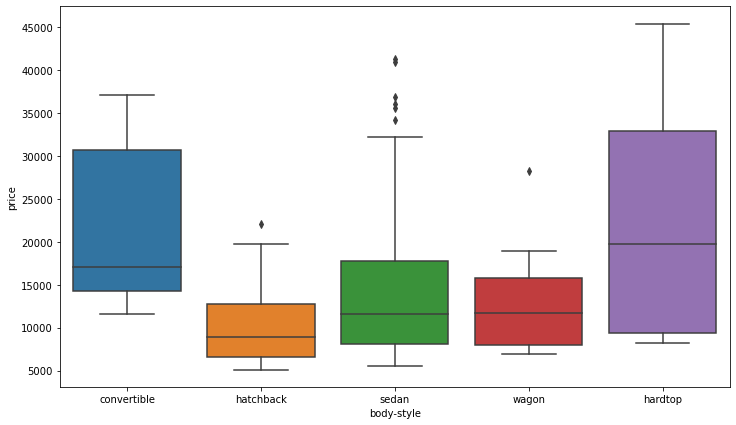

In [26]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=cars, x='body-style', y='price')
plt.show()

Verificando relacionamento entre 'engine-location' e 'price'

In [27]:
cars['engine-location'].unique()

array(['front', 'rear'], dtype=object)

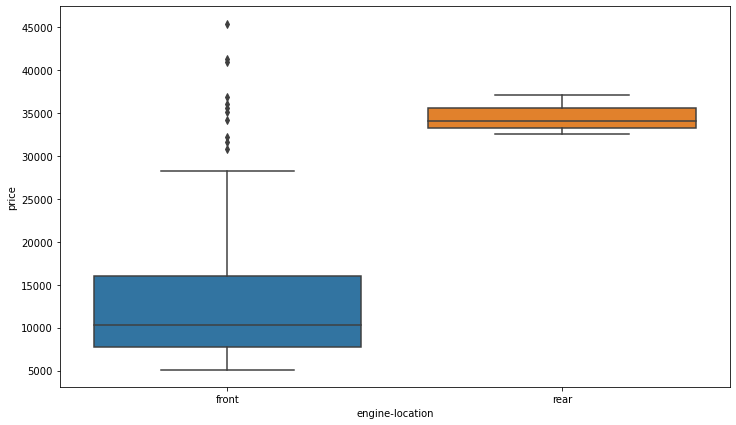

In [28]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=cars, x='engine-location', y='price')
plt.show()

Verificando relacionamento entre 'drive-wheels' e 'price'

In [29]:
cars['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

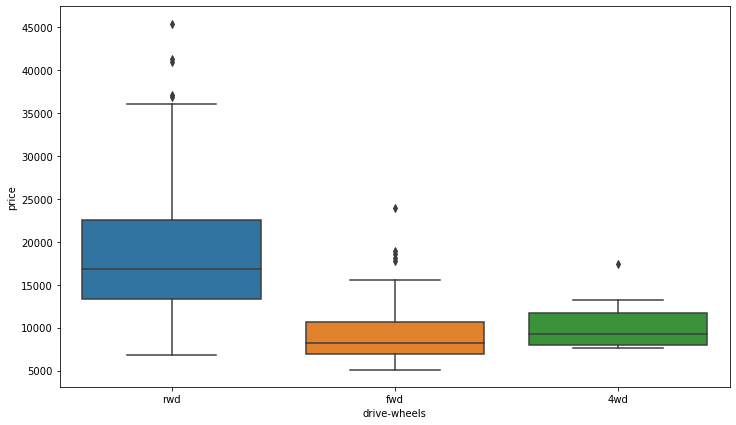

In [30]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=cars, x='drive-wheels', y='price')
plt.show()

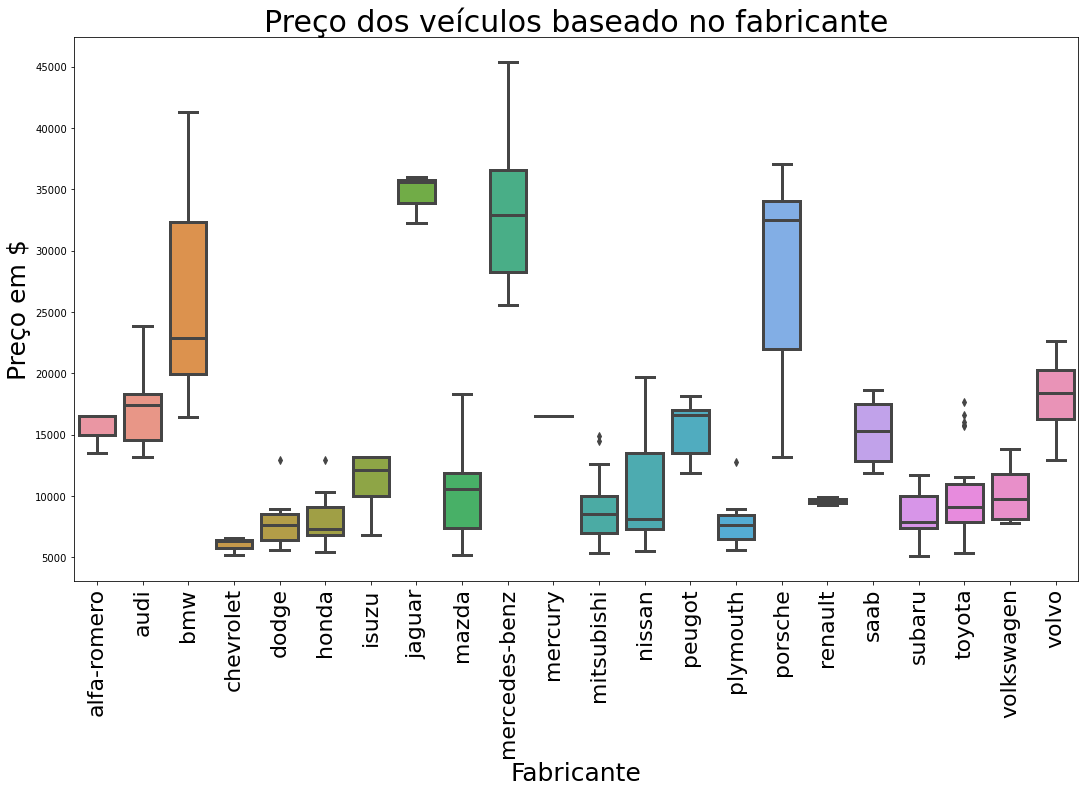

In [45]:
plt.subplots(figsize=(18,10))
ax = sns.boxplot(data=cars, x='make', y='price', width=0.8, linewidth=3)
ax.set_xlabel('Fabricante', fontsize=25)
ax.set_ylabel('Preço em $', fontsize=25)
plt.title('Preço dos veículos baseado no fabricante', fontsize=30)
ax.tick_params(axis='x', labelsize=22, rotation=90)
plt.show()

É possível perceber através dos gráficos que existe uma relação mais visível entre as variáveis 'engine-location' e 'price', de forma que veículos com motores localizados à frente possuem valores mais baixos do que os mesmos com motores localizados na parte da frente. Entretanto, como mais de 90% dos veículos possuem motor na parte frontal, não é um dado relevante para prever valores de veículos. Com relação à variável 'drive-wheels', existe uma pequena relação entre veículos com tração nas rodas traseiras terem um valor médio maior do que veículos com tração na parte frontal e tração nas 4 rodas. Dentre as marcas dos veícuos, os modelos de fabricantes bmw, jaguar, mercedes-benz e porche são os com maior valor médio de preço. Gráficos de caixa (boxplots) são excelentes para detectar outliers para preparação do conjunto de dados com a finalidade de utilizar algoritmos de aprendizado de máquina (machine learning)

### 3.2- Calculando a correlação entre as variáveis numéricas

o coeficiente de correlação de Pearson, também chamado de "coeficiente de correlação produto-momento" ou simplesmente de "ρ de Pearson" mede o grau da correlação (e a direcção dessa correlação - se positiva ou negativa) entre duas variáveis de escala métrica (intervalar ou de rácio/razão). Este coeficiente, normalmente representado por ρ assume apenas valores entre -1 e 1.

* Valor = 1 : Significa uma correlação perfeita positiva entre as duas variáveis.
* Valor = -1: Significa uma correlação negativa perfeita entre as duas variáveis - Isto é, se uma aumenta, a outra sempre diminui.
* Valor = 0 : Significa que as duas variáveis não dependem linearmente uma da outra.

In [31]:
cars.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.008689,-0.178515,0.071380,0.273678,-0.035823,0.034606,-0.082201
normalized-losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,0.054929,-0.114525,0.203434,0.237748,-0.218749,-0.178221,0.133999
wheel-base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.160944,0.249786,0.351985,-0.360700,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.129522,0.158414,0.554408,-0.287034,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.182939,0.181129,0.642176,-0.219861,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,-0.055351,0.261214,-0.110114,-0.320599,-0.048640,-0.107358,0.134388
curb-weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.168783,0.151362,0.750973,-0.266282,-0.757414,-0.797465,0.820825
engine-size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.203094,0.028971,0.810705,-0.244600,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,-0.055909,0.005201,0.575707,-0.254765,-0.584508,-0.586992,0.532300
stroke,-0.008689,0.054929,0.160944,0.129522,0.182939,-0.055351,0.168783,0.203094,-0.055909,1.000000,0.186105,0.088133,-0.066860,-0.042179,-0.043961,0.082095


In [32]:
#Encontrando a correlação entre as variáveis selecionadas
cars[['bore', 'horsepower', 'stroke', 'compression-ratio']].corr()

,bore,horsepower,stroke,compression-ratio
bore,1.000000,0.575707,-0.055909,0.005201
horsepower,0.575707,1.000000,0.088133,-0.205717
stroke,-0.055909,0.088133,1.000000,0.186105
compression-ratio,0.005201,-0.205717,0.186105,1.000000


### 3.3 - Relacionamento linear positivo

<AxesSubplot:xlabel='engine-size', ylabel='price'>

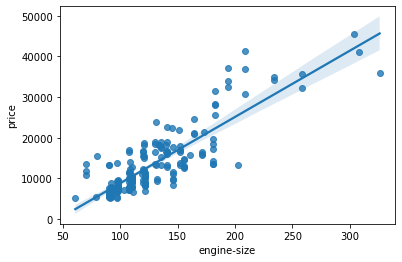

In [33]:
#regplot de Engine-size por price
sns.regplot(data=cars, x='engine-size', y='price')

De acordo com o gráfico linear, podemos perceber que existe uma correlação positiva entre o tamanho do motor do automóvel com o valor do automóvel (positiva pois, quanto maior o motor, existe uma tendência positiva do preço do veículo ser maior.)

In [34]:
# Grau de correlação entre tamanho do motor e preço é de aprox. 0.862
cars[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.861752
price,0.861752,1.000000


### 3.4- Relacionamento linear negativo

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

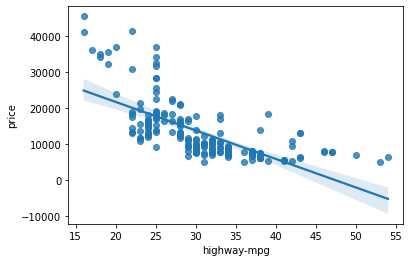

In [35]:
#regplot de highway-mpg por price
sns.regplot(data=cars, x='highway-mpg', y='price')

Como podemos ver, existe uma correlação negativa entre rendimento de combustível na autoestrada com o preço do veículo. Quanto maior o valor de highway-mpg, menor o valor de price.

In [36]:
# Grau de correlação entre rendimento na autoestrada e preço é de aprox. -0.69
cars[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.690526
price,-0.690526,1.000000


### 3.5- Relacionamento linear fraco

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

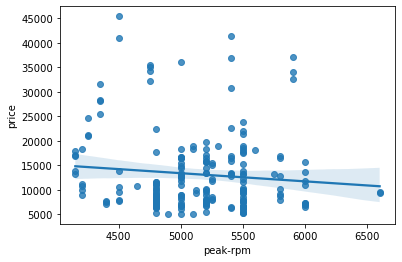

In [37]:
#regplot de peak-rpm e price
sns.regplot(data=cars, x='peak-rpm', y='price')

Neste gráfico verificamos que os dados de peak-rpm estão dispersos pelo plano, de forma que não se percebe correlação de relevância entre as partes. Logo, peak-rpm é um atributo que não influencia no preço do veículo.

In [38]:
#Grau de correlação entre peak-rpm e price é de praticamente -0.1
cars[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.100851
price,-0.100851,1.000000


Outro exemplo de correlação fraca:

In [39]:
#Grau de correlação entre stroke e price é menor que 0.1
cars[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082095
price,0.082095,1.000000
